<a href="https://colab.research.google.com/github/JJJavier23/DeepLearning/blob/main/undercomplete_overcomplete_autoencoder_class_activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import layers, models

In [2]:
# Load and preprocess the Iris dataset
data = load_iris()
X = data.data  # 4 features
y = data.target  # Class labels (used only for visualization)

In [3]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data for better training
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [4]:
# Function to build an autoencoder
def build_autoencoder(input_dim, latent_dim):
    # Encoder
    encoder = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(2, activation='relu'),
        layers.Dense(latent_dim, activation='relu')
    ])

    # Decoder
    decoder = models.Sequential([
        layers.Input(shape=(latent_dim,)),
        layers.Dense(2, activation='relu'),
        layers.Dense(input_dim, activation='linear')
    ])

    # Autoencoder
    autoencoder = models.Sequential([encoder, decoder])
    return autoencoder, encoder

In [5]:
# Undercomplete autoencoder: Latent space < Input dimensions
undercomplete_latent_dim = 2
undercomplete_ae, undercomplete_encoder = build_autoencoder(input_dim=4, latent_dim=undercomplete_latent_dim)

# Overcomplete autoencoder: Latent space > Input dimensions
overcomplete_latent_dim = 12
overcomplete_ae, overcomplete_encoder = build_autoencoder(input_dim=4, latent_dim=overcomplete_latent_dim)

In [6]:
# Compile autoencoders
undercomplete_ae.compile(optimizer='adam', loss='mse')
overcomplete_ae.compile(optimizer='adam', loss='mse')

# Train both autoencoders
epochs = 50
batch_size = 16

print("Training Undercomplete Autoencoder...")
undercomplete_ae.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, verbose=0)

print("Training Overcomplete Autoencoder...")
overcomplete_ae.fit(X_train, X_train, epochs=epochs, batch_size=batch_size, verbose=0)

Training Undercomplete Autoencoder...
Training Overcomplete Autoencoder...


In [7]:
# Visualize reconstruction errors
def visualize_reconstruction_error(autoencoder, data, title):
    reconstructed = autoencoder.predict(data)
    mse = np.mean(np.square(data - reconstructed), axis=1)
    plt.figure(figsize=(8, 6))
    plt.hist(mse, bins=20, color='blue', alpha=0.7, label='Reconstruction Error')
    plt.title(title)
    plt.xlabel("Mean Squared Error")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

Undercomplete Autoencoder Reconstruction Error:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step


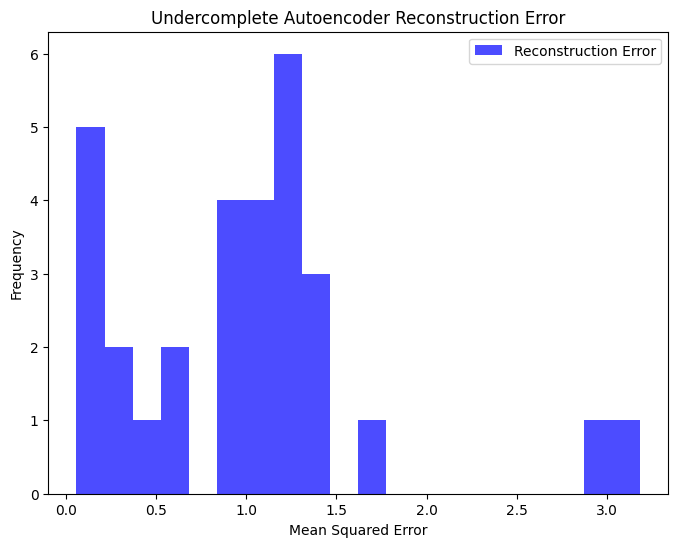

Overcomplete Autoencoder Reconstruction Error:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step


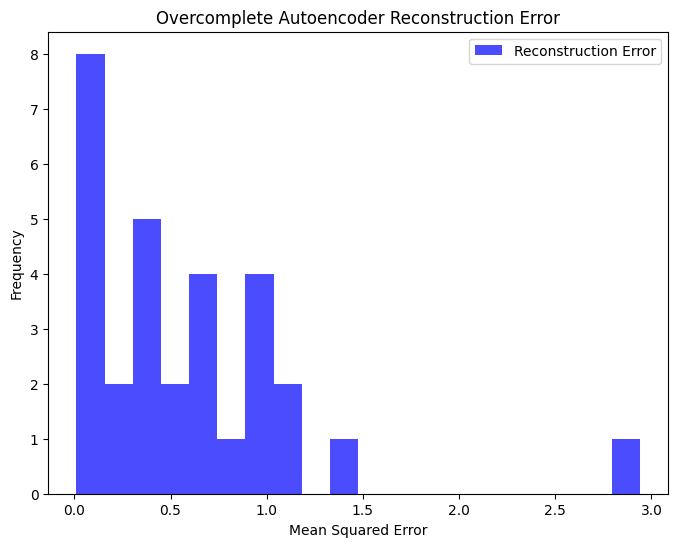

In [8]:
print("Undercomplete Autoencoder Reconstruction Error:")
visualize_reconstruction_error(undercomplete_ae, X_test, "Undercomplete Autoencoder Reconstruction Error")

print("Overcomplete Autoencoder Reconstruction Error:")
visualize_reconstruction_error(overcomplete_ae, X_test, "Overcomplete Autoencoder Reconstruction Error")